In [42]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set_style("darkgrid")

XS_FIX_CONS = [6, 8, 10, 12, 14, 16, 18, 20]
XS_FIX_DIST = [i for i in range(24, 128, 16)]
XS_FIX_LEN = [i for i in range(16, 129, 8)]
XS_FIX_OPENS = [8, 16, 24, 32, 40, 48]
TOTAL = 10000

def load_plot_data(fn):
    points = []
    data = dict()
    data['fix-len-prediction'] = []
    data['fix-cons'] = []
    data['fix-dist'] = []
    data['fix-opens'] = []
    
    with open(fn, 'r') as f:
        for line in f:
            line = line.split(' ')
            name = line[0]
            loss = float(line[2])
            vecacc = float(line[3])
            valacc = float(line[4])
            m = re.match("[^0-9]*([0-9]+)", name)
            val = int(m.groups()[0])
            tp = name.split("/")[1]
            data[tp] += [(val, loss, vecacc, valacc)]
            data[tp].sort(key=lambda x: x[0])
    return data
    

{'fix-cons': [(6, 954.7295, 0.0203, 0.2911666666666667),
  (8, 2861.133, 0.0062, 0.05486666666666667),
  (10, 4639.7453, 0.0024, 0.014566666666666667),
  (12, 5795.8214, 0.0, 0.0),
  (14, 6461.9733, 0.0, 0.0),
  (16, 7045.2445, 0.0, 0.0),
  (18, 7501.4108, 0.0, 0.0),
  (20, 7853.1944, 0.0, 0.0)],
 'fix-dist': [(24, 14.5793, 0.0, 0.13663333333333333),
  (40, 439.0517, 0.0, 0.07586666666666667),
  (56, 1504.337, 0.0, 0.051800000000000006),
  (72, 3214.2507, 0.0, 0.033999999999999996),
  (88, 5638.5919, 0.0, 0.0334),
  (104, 8726.7521, 0.0, 0.022766666666666668),
  (120, 12535.8329, 0.0, 0.012633333333333335)],
 'fix-len-prediction': [(16, 7.7883, 0.2017, 0.6676333333333333),
  (24, 0.5342, 0.5322, 0.8219333333333334),
  (32, 29.9467, 0.0257, 0.14816666666666667),
  (48, 298.1901, 0.0045, 0.060033333333333334),
  (56, 534.1478, 0.0016, 0.0529),
  (64, 842.581, 0.0013, 0.043366666666666664),
  (72, 1160.7646, 0.0004, 0.038766666666666665),
  (80, 1585.1779, 0.0003, 0.03506666666666667),
  

In [47]:
DATA_PATH = "./test-results"
TOTAL = 10000

files = os.listdir(DATA_PATH)
files.sort()
names = []
for fn in files:
    fn = fn[:-4].split("_")
    name = ""
    if fn[0] == 'n':
        name += "BASIC "
    else:
        name += "LSTM "
    if fn[1].isdecimal():
        name += "L: " + fn[1]
    else:
        name += "L in [16..64]"
    names += [name]

data = []
for name, fn in zip(names, files):
    d = load_plot_data(DATA_PATH + '/' + fn)
    data += [(name, d)]

In [122]:
# FIX CONS
XS_FIX_CONS = [6, 8, 10, 12, 14, 16, 18, 20]

cons_vec_acc = []
for name, d in data:
    acc = []
    for v in d['fix-cons']:
        acc += [v[2]]
    cons_vec_acc += [acc]

cons_val_acc = []
for name, d in data:
    acc = []
    for v in d['fix-cons']:
        acc += [v[3]]
    cons_val_acc += [acc]

cons_loss = []
for name, d in data:
    acc = []
    for v in d['fix-cons']:
        acc += [v[1]]
    cons_loss += [acc]

In [123]:
# FIX DIST
XS_FIX_DIST = [i for i in range(24, 128, 16)]

dist_vec_acc = []
for name, d in data:
    acc = []
    for v in d['fix-dist']:
        acc += [v[2]]
    dist_vec_acc += [acc]

dist_val_acc = []
for name, d in data:
    acc = []
    for v in d['fix-dist']:
        acc += [v[3]]
    dist_val_acc += [acc]

dist_loss = []
for name, d in data:
    acc = []
    for v in d['fix-dist']:
        acc += [v[1]]
    dist_loss += [acc]

In [130]:
# FIX OPENS
XS_FIX_OPENS = [8, 16, 24, 32, 40, 48]

opens_vec_acc = []
for name, d in data:
    acc = []
    for v in d['fix-opens']:
        acc += [v[2]]
    opens_vec_acc += [acc]

opens_val_acc = []
for name, d in data:
    acc = []
    for v in d['fix-opens']:
        acc += [v[3]]
    opens_val_acc += [acc]

opens_loss = []
for name, d in data:
    acc = []
    for v in d['fix-opens']:
        acc += [v[1]]
    opens_loss += [acc]

In [137]:
# FIX LEN

XS_FIX_LEN = [i for i in range(16, 40, 8)] + [i for i in range(48, 129, 8)]

lens_vec_acc = []
for name, d in data:
    acc = []
    for v in d['fix-len-prediction']:
        acc += [v[2]]
    lens_vec_acc += [acc]

lens_val_acc = []
for name, d in data:
    acc = []
    for v in d['fix-len-prediction']:
        acc += [v[3]]
    lens_val_acc += [acc]

lens_loss = []
for name, d in data:
    acc = []
    for v in d['fix-len-prediction']:
        acc += [v[1]]
    lens_loss += [acc]

In [126]:
def plot_cons(xs, names, losses, vals, vecs, suptitle, xlab, fname):
    plt.subplots(3, 1, figsize=(12,16))
    X_LABEL = xlab
    plt.suptitle(suptitle, fontsize=14)
    plt.subplot(311)
    for name, y in zip(names, losses):
        plt.plot(xs, y, 'o-', label=name);
        
    plt.xlabel(X_LABEL)
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(312)
    for name, y in zip(names, vals):
        plt.plot(xs, y,'o-',  label=name);
        
    plt.xlabel(X_LABEL)
    plt.ylabel("Value Accuracy")
    plt.legend()
    
    
    plt.subplot(313)
    for name, y in zip(names, vecs):
        plt.plot(xs, y, 'o-', label=name);
        
    plt.xlabel(X_LABEL)
    plt.ylabel("Vector Accuracy")
    plt.legend()

#     plt.tight_layout()

    plt.subplots_adjust(left=0.1, wspace=0.2, top=0.95)

    plt.savefig("imgs/%s.png" % fname)

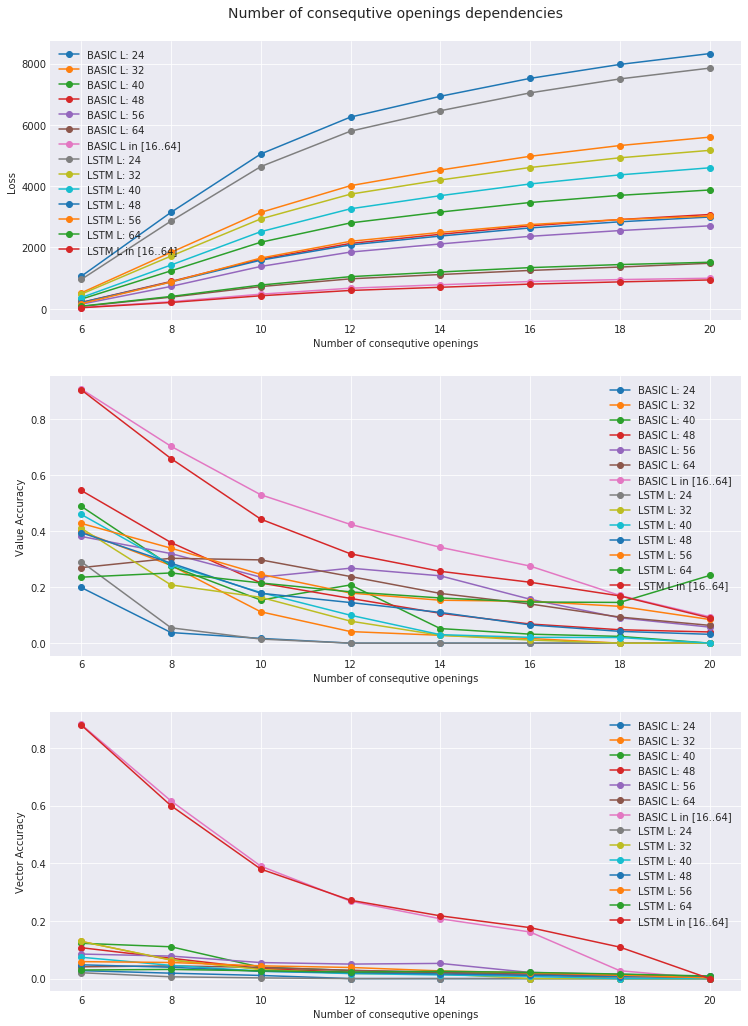

In [127]:
plot_cons(XS_FIX_CONS, names, cons_loss, cons_val_acc, cons_vec_acc, "Number of consequtive openings dependencies", "Number of consequtive openings", 'dep-cons')

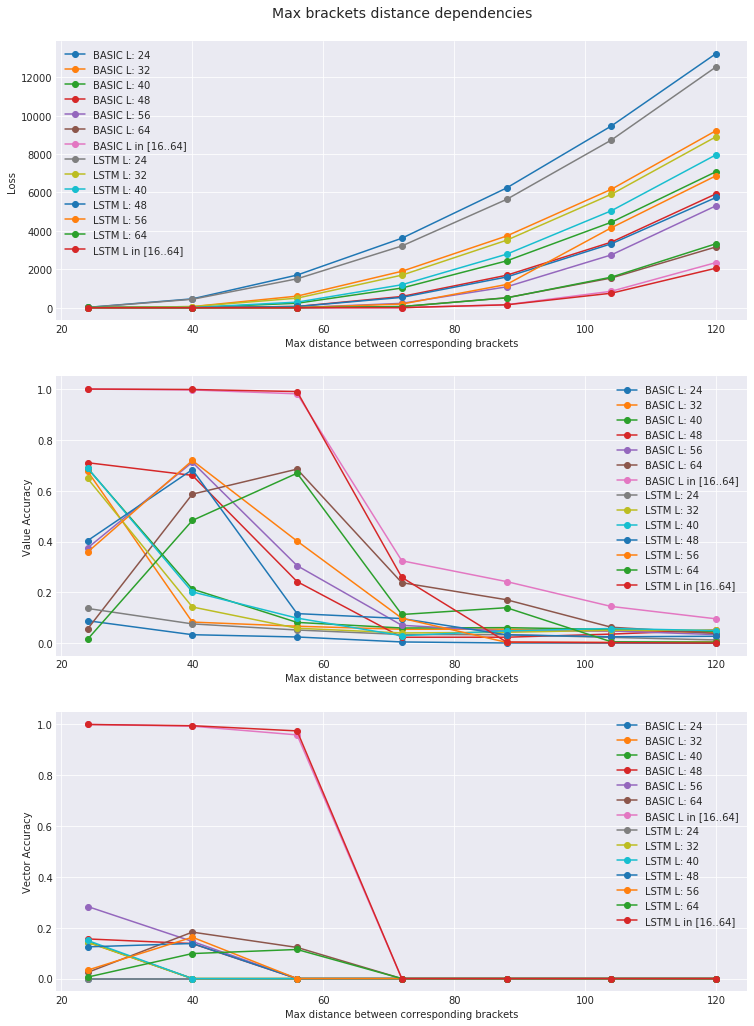

In [128]:
plot_cons(XS_FIX_DIST, names, dist_loss, dist_val_acc, dist_vec_acc, "Max brackets distance dependencies", "Max distance between corresponding brackets", 'dep-dist')

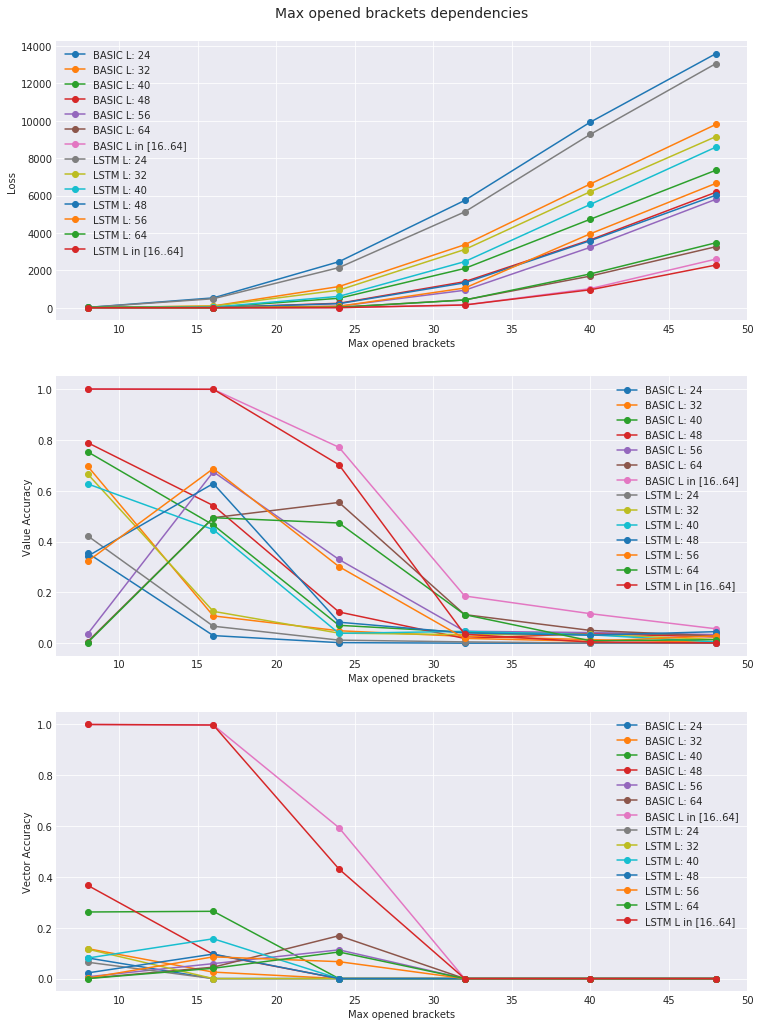

In [131]:
plot_cons(XS_FIX_OPENS, names, opens_loss, opens_val_acc, opens_vec_acc, "Max opened brackets dependencies", "Max opened brackets", 'dep-opens')

In [138]:
plot_cons(XS_FIX_LEN, names, lens_loss, lens_val_acc, lens_vec_acc, "Sequence length dependencies", "Sequence length", 'dep-lens')